    For Network Assurance and device data--

In [1]:
import pandas as pd
from imblearn.over_sampling import SMOTE
import numpy as np
import datetime as dt

In [ ]:
#Scaling function if required:
def scale_df(data,cols):
    data_scaler = MinMaxScaler(feature_range=(0,1))
    scaling_cols = cols
    data_scaled = data[scaling_cols]
    data_scaled = data_scaler.fit_transform(data_scaled)
    data_scaled = pd.DataFrame(data_scaled,columns = scaling_cols)
    data = data.drop(scaling_cols,axis=1)
    data[scaling_cols] = data_scaled
    return data

In [199]:
#------------------------------Load Data--------------------------------------#
path = 'C:/Users/skuma542/Desktop/Network Assurance Model/Voda_Data/'
CPEs = pd.read_csv(path+'CPEs_Data.csv')
Fixed_Net_Alarms = pd.ExcelFile(path+"Fixed_Network_Alarms.xlsx")
alarms = Fixed_Net_Alarms.parse("Esporta foglio di lavoro")
#one_web_alarms = pd.read_csv("data/OneWebData/event_policy1.txt", delimiter="|")


In [200]:
#-------------------------Translate Columns-----------------------------------#

#Translate Columns
alarms.columns = ['APPEARENT TYPE', 'ID_APPARATE', 'NV_ADDITIONAL_INFO', 'SUMMARY',
       'FIRST_OCCURRENCE_DATE', 'LAST_OCCURRENCE_DATE', 'FLG_CURRENT']


CPEs.columns = ['ACTIVATION_DATE', 'year_mese', 'year_mese_ind', 'Bearer_attach', 'BNG',
       'BNG_VOCE', 'CPE_ID', 'CUSTOMER_CODE', 'DATA_CARICAMENTO', 'DATA_FILE',
       'DATA_MIGRATION_ULL', 'DEACTIVATION_DATE', 'device', 'Device_Type',
       'DSLAM', 'Family_OS', 'ID_CABINET', 'KIT', 'Last_collection_time',
       'Last_Update', 'LINK_ACCOUNT', 'MARKET', 'Model', 'MODEM', 'MSISDN',
       'NUMBER_REBOOT', 'PROFILE', 'PROTOCOL', 'PROVINCES', 'REGION',
       'Status_Uptime', 'Workflow State', 'STATUS', 'Sw_version_VOX',
       'TECHNICAL_PACK_ID', 'technology', 'access type', 'TYPE_VRU', 'video',
       'VIK_MODEL', 'vp_code', 'ZONE_VF', 'AVAILABILITY_3G_DATA',
       'AVAILABILITY_3G_VOICE', 'AVAILABILITY_4G_DATA',
       'AVAILABILITY_4G_VOICE', 'BACKUP_3G_SUM_YEST_DATA',
       'BACKUP_3G_SUM_YEST_VOICE', 'BACKUP_4G_SUM_YEST_DATA',
       'BACKUP_4G_SUM_YEST_VOICE', 'BOOT', 'BOOTSTRAP_0', 'CONNECTED_HOSTS',
       'DATA_ETHERNET_BYTES_RECEIVED', 'Data_service_Availability', 'DISTANCE',
       'DOWNSTREAM_CURRENT_BITRATE', 'FEC_ERRORS',
       'FIXED_MOBILE_SWITCH_SUM_YEST', 'INCOMING_CALLS_CONNECTED',
       'OUTGOING_CALLS_CONNECTED', 'Reachability', 'ShowTimeStart',
       'ShowtimeTotal', 'ShowtimeTotal_Corr', 'SIGNAL_POWER', 'Uptime',
       'VALUE_AVAILABILITY_VS', 'VALUE_CHANGE', 'VALUE_CRCErrors',
       'VALUE_DownAttenuation', 'VALUE_DownNoiseMargin', 'VALUE_LinkRetrain',
       'VALUE_SAC', 'VALUE_UPTIME_VS', 'VIK_PRESENCE', 'VIK_Serial_number',
       'Voice_service_Availability', 'WAN_Data_service_Availability_To',
       'WAN_Data_Voice_availability_Tot', 'WAN_THROUGHPUT_YEST_DOWN',
       'WAN_THROUGHPUT_YEST_UP']

In [201]:
#---------------------------Update Device Data--------------------------------#
#Select Features, replace nans with 0 and '.' with 0
sub_CPEs = (CPEs.drop(['ACTIVATION_DATE', 'year_mese', 'year_mese_ind',
           'Bearer_attach', 'BNG', 'CPE_ID', 'BNG_VOCE', 'CUSTOMER_CODE',
           'DATA_CARICAMENTO', 'DATA_FILE', 'DATA_MIGRATION_ULL', 'device',
           'Device_Type', 'DSLAM', 'Family_OS', 'ID_CABINET', 'KIT',
           'Last_collection_time', 'Last_Update', 'LINK_ACCOUNT', 'MARKET',
           'Model', 'MODEM', 'MSISDN', 'NUMBER_REBOOT', 'PROFILE', 'PROTOCOL',
           'PROVINCES', 'REGION', 'Status_Uptime', 'Workflow State','STATUS',
           'Sw_version_VOX', 'TECHNICAL_PACK_ID', 'technology', 'access type',
           'TYPE_VRU', 'video', 'VIK_MODEL','vp_code',
           'AVAILABILITY_3G_DATA', 'AVAILABILITY_4G_DATA', 'AVAILABILITY_4G_VOICE',
           'BACKUP_3G_SUM_YEST_DATA', 'BACKUP_3G_SUM_YEST_VOICE',
           'BACKUP_4G_SUM_YEST_DATA', 'BACKUP_4G_SUM_YEST_VOICE', 'Reachability',
           'VALUE_SAC', 'VIK_Serial_number', 'AVAILABILITY_3G_VOICE'], axis=1)
           .fillna(0)
           .replace('.',0))

In [202]:
#Cast as numeric
for col in sub_CPEs:
    if col != 'BNG_VOCE':
        sub_CPEs[col] = pd.to_numeric(sub_CPEs[col])

In [203]:
#Label Data
sub_CPEs["Label"] = np.where(sub_CPEs['Voice_service_Availability'] == 100, 0, 1)

In [16]:
sub_CPEs.head()

,DEACTIVATION_DATE,ZONE_VF,BOOT,BOOTSTRAP_0,CONNECTED_HOSTS,DATA_ETHERNET_BYTES_RECEIVED,Data_service_Availability,DISTANCE,DOWNSTREAM_CURRENT_BITRATE,FEC_ERRORS,...,VALUE_DownNoiseMargin,VALUE_LinkRetrain,VALUE_UPTIME_VS,VIK_PRESENCE,Voice_service_Availability,WAN_Data_service_Availability_To,WAN_Data_Voice_availability_Tot,WAN_THROUGHPUT_YEST_DOWN,WAN_THROUGHPUT_YEST_UP,Label
0,0,3.0,0,0,0.0,267631943,0.0,1312,4348.0,85226,...,6.28,0,100.0,0,0.0,0.00,0.00,0,0,1
1,0,2.0,0,0,1.7,943479329,100.0,960,6723.0,104,...,16.94,0,100.0,1,100.0,99.96,99.96,0,0,0
2,0,2.0,0,0,0.1,1160567250,100.0,605,8124.0,110,...,7.41,0,100.0,0,100.0,100.00,100.00,6616,688,0
3,0,4.0,0,0,0.0,0,0.0,376,0.0,4,...,0.00,0,100.0,1,0.0,0.00,0.00,0,0,1
4,0,2.0,0,0,1.3,3453313641,100.0,1057,9215.0,647,...,12.28,0,100.0,1,100.0,99.99,99.99,7960,720,0


In [204]:
#Oversample
#This is with all of the data.  Do not do this, the test data could be
#bled into train set
X = sub_CPEs.drop(['Voice_service_Availability', 'Label','VALUE_AVAILABILITY_VS'], axis=1)
y = sub_CPEs.Label

In [205]:
print('0 :', list(y).count(0))
print('1 :', list(y).count(1))
smt = SMOTE(random_state=0)  #k=5, ratio=0.65
XUP, YUP = smt.fit_sample(X, y)
print("------------------------------")
print('0 :', list(YUP).count(0))
print('1 :', list(YUP).count(1))

0 : 91
1 : 28
------------------------------
0 : 91
1 : 91


In [206]:
#Create oversampled DF
Xdf = pd.DataFrame(XUP)
Xdf.columns = X.columns
ydf = pd.DataFrame(YUP)
DFUP = pd.concat([Xdf, ydf], axis=1).rename(columns={0:'Label'})

In [208]:
#Apply device ids to failed and not failed devices
#Create device ids based on count of alarms and randomly assign for each subset
#No Failed devices have the most observations in device data
#Failed devices have the most observations in alarms data

devs_no_fail = (list(CPEs.groupby("BNG_VOCE").count().reset_index()
                .sort_values('year_mese', ascending=False)['BNG_VOCE'][:10]))
devs_failed = (list(alarms.groupby("ID_APPARATE").count().reset_index()
                .sort_values('SUMMARY', ascending=False)['ID_APPARATE'][:10]))
fail = DFUP[DFUP.Label == 1].copy()
no_fail = DFUP[DFUP.Label == 0].copy()
fail['device'] = np.random.choice(devs_no_fail,fail.shape[0]) #, size=62 
no_fail['device'] = np.random.choice(devs_failed,no_fail.shape[0]) #, size=96
devices = pd.concat([fail, no_fail])

In [210]:
#format columns so that they resemble SL data.
devices.WAN_Data_service_Availability_To = round(devices.WAN_Data_service_Availability_To, 2)
devices.WAN_Data_Voice_availability_Tot = round(devices.WAN_Data_Voice_availability_Tot, 2)
devices.WAN_THROUGHPUT_YEST_DOWN = round(devices.WAN_THROUGHPUT_YEST_DOWN, 2)
devices.WAN_THROUGHPUT_YEST_UP = round(devices.WAN_THROUGHPUT_YEST_UP, 2)
devices.VALUE_UPTIME_VS = round(devices.VALUE_UPTIME_VS, 2)
devices.VALUE_LinkRetrain = round(devices.VALUE_LinkRetrain).apply(int)
devices.VALUE_DownAttenuation= round(devices.VALUE_DownAttenuation, 2)
devices.VALUE_CRCErrors = devices.VALUE_CRCErrors.apply(int)
devices.SIGNAL_POWER = devices.SIGNAL_POWER.apply(int)
devices.ShowtimeTotal_Corr = round(devices.ShowtimeTotal_Corr, 2)
devices.ShowtimeTotal = round(devices.ShowtimeTotal,2)
devices.ShowTimeStart = round(devices.ShowTimeStart).apply(int)
devices.DOWNSTREAM_CURRENT_BITRATE = round(devices.DOWNSTREAM_CURRENT_BITRATE,2)
devices.Data_service_Availability = round(devices.Data_service_Availability,2)
devices.FEC_ERRORS = round(devices.FEC_ERRORS).apply(int)
devices.BOOT = round(devices.BOOT).apply(int)
devices.VALUE_DownNoiseMargin = round(devices.VALUE_DownNoiseMargin, 2)
devices.DATA_ETHERNET_BYTES_RECEIVED = round(devices.DATA_ETHERNET_BYTES_RECEIVED).apply(int)

In [211]:
def min_max(col):
    """Scales Data"""
    return round((col-v_min)/(v_max-v_min), 2)

In [212]:
v_min = devices.CONNECTED_HOSTS.min()
v_max = devices.CONNECTED_HOSTS.max()
devices.CONNECTED_HOSTS = devices.CONNECTED_HOSTS.apply(min_max)

In [213]:
#Select features
sub_devices = devices[['device','BOOT', 'CONNECTED_HOSTS',
       'DATA_ETHERNET_BYTES_RECEIVED', 'Data_service_Availability',
       'DOWNSTREAM_CURRENT_BITRATE', 'FEC_ERRORS',
       'INCOMING_CALLS_CONNECTED',
       'OUTGOING_CALLS_CONNECTED', 'ShowTimeStart', 'ShowtimeTotal',
       'ShowtimeTotal_Corr', 'SIGNAL_POWER',
       'VALUE_CRCErrors', 'VALUE_DownAttenuation', 'VALUE_DownNoiseMargin',
       'VALUE_LinkRetrain', 'VALUE_UPTIME_VS',
       'WAN_Data_service_Availability_To', 'WAN_THROUGHPUT_YEST_DOWN',
       'WAN_THROUGHPUT_YEST_UP', 'Label']]

In [214]:
#Update Column Names to resemble SL Data
SL_cols = (["Device", "Error_Discards", "State", "Packets_Octets",
    "Availability_24HR", "IF_Speed", "Alerts", "Packets_Errors",
    "Packets_Discards", "Latency", "IO_Memory_Free", "CPU", "IO_Memory_Valid",
    "CRC_Errors", "Down_Attenuation", "Noise", "Process_Memory_Valid",
    "Uptime_24HR", "Memory", "Throughput_Down", "Throughput_Up",  "Failed"])
sub_devices.columns = SL_cols

In [216]:
#Update Device IDs to resemble SL Data
SL_device_ids = ['Performance_UT_330', 'Performance_UT_321', 'Performance_UT_368',
                 'Performance_UT_303', 'Performance_UT_334', 'Performance_UT_338',
                 'Performance_UT_372', 'Performance_UT_364', 'Performance_UT_345',
                 'Performance_UT_333', 'Performance_UT_377', 'Performance_UT_353',
                 'Performance_UT_341', 'Performance_UT_360', 'Performance_UT_381',
                 'Performance_UT_354', 'Performance_UT_346', 'Performance_UT_395',
                 'Performance_UT_387', 'Performance_UT_354']
device_dict = dict(zip(sub_devices.Device.unique(), SL_device_ids))
sub_devices = sub_devices.replace(device_dict)

In [218]:
#----------------------------Update Alarm Data--------------------------------#

#Drop unused columns
alarms = alarms.drop(["APPEARENT TYPE","FLG_CURRENT"], axis=1)

#Update Alarms IDs
#Most common alarms used
alarm_id_dict = dict(zip((alarms.ID_APPARATE.value_counts()[:20]).index, SL_device_ids))
alarms = alarms.replace(alarm_id_dict)

In [219]:
#Filter out only alarms in device data
sub_alarms = (alarms[alarms['ID_APPARATE'].str.contains("Performance")]
                .drop(['NV_ADDITIONAL_INFO'], axis=1))

In [220]:
#Update Alarm Summary to resemble SL data
alarm_dict = {"Loss Of Signal" : "Collection Failed One or More Requests",
    "MA5616: Communication with the device failed" : "Service terminated unexpectedly",
    "MA5616: The power of the device is cut off" : "Plain Failures Exceeded Threshold",
    "Resource Isolation" : "Received Errors has exceeded threshold"}
sub_alarms.SUMMARY = sub_alarms.SUMMARY.replace(alarm_dict)

In [221]:
#Create Severity Column
sev_dict= {"Collection Failed One or More Requests":2,
         "Service terminated unexpectedly":3,
         "Plain Failures Exceeded Threshold":2,
         "Received Errors has exceeded threshold":1}
sub_alarms["severity"] = sub_alarms.SUMMARY.replace(sev_dict)

sub_alarms.columns = ["Device","Name","First_Occurrence_Date",
                    "Last_Occurrence_Date", "Severity"]

#Format Dates and Get Seconds Between Occurances
sub_alarms.First_Occurrence_Date = pd.to_datetime(sub_alarms.First_Occurrence_Date)
sub_alarms.Last_Occurrence_Date = pd.to_datetime(sub_alarms.Last_Occurrence_Date)
sub_alarms['Seconds_Between_Occurances'] = ((sub_alarms.Last_Occurrence_Date -
                                            sub_alarms.First_Occurrence_Date)
                                            .dt.total_seconds())

In [223]:
#Write out to csv
path='C:/Users/skuma542/Desktop/Network Assurance Model/Jupyter_file/Data_generated/'
sub_devices.to_csv(path+'devices.csv',index=False)
sub_alarms.to_csv(path+'alarms.csv',index=False)

     Doing Some Analysis and Modeling

In [232]:
alarms = pd.read_csv(path+'alarms.csv')
devices = pd.read_csv(path+'devices.csv')

In [234]:
import statsmodels.api as sm
y = devices.Failed
cols = ['Error_Discards','Alerts', 'Packets_Errors',
       'Packets_Discards', 'Latency', 'CPU',
       'IO_Memory_Valid', 'CRC_Errors', 'Down_Attenuation', 'Noise',
       'Process_Memory_Valid', 'Uptime_24HR', 'Memory', #'Throughput_Down',
       'Throughput_Up']
X = devices[cols]

model = sm.Logit(y,X)
result = model.fit()
print(result.summary2())
print(np.exp(result.params))


         Current function value: 0.233430
         Iterations: 35
                                   Results: Logit
Model:                     Logit                  Pseudo R-squared:       0.663     
Dependent Variable:        Failed                 AIC:                    112.9685  
Date:                      2019-07-10 14:36       BIC:                    157.8246  
No. Observations:          182                    Log-Likelihood:         -42.484   
Df Model:                  13                     LL-Null:                -126.15   
Df Residuals:              168                    LLR p-value:            6.4156e-29
Converged:                 0.0000                 Scale:                  1.0000    
No. Iterations:            35.0000                                                  
------------------------------------------------------------------------------------
                      Coef.     Std.Err.      z    P>|z|      [0.025       0.975]   
----------------------------------

C:\Users\skuma542\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [235]:
import seaborn as sns
import matplotlib.pyplot as plt

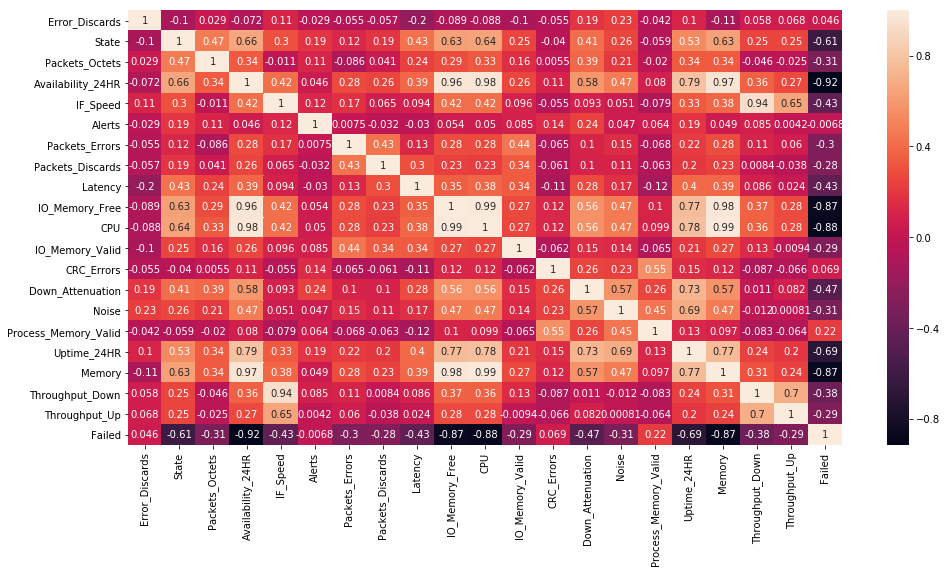

In [236]:
plt.figure(figsize=(16,8))
sns.heatmap(devices.corr(),annot=True)

In [237]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [239]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [242]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)
y_pred2 = logreg.predict(X_train)
#y_pred3 = logreg.predict_proba(X_test)

C:\Users\skuma542\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [ ]:
# Try with Probability if required.
'''
#print(y_test)
temp = []
for x in y_pred3:
    if(x[1] > 0.14):
        temp.append(1)
    else:
        temp.append(0)
#print(temp)
print('Accuracy:',accuracy_score(y_test,temp))
'''

In [244]:
print('Accuracy (Train Data):',accuracy_score(y_train,y_pred2))
print('Accuracy:',accuracy_score(y_test,y_pred))
print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred))
print('Confusion Matrix (Train Data):\n',confusion_matrix(y_train,y_pred2))
print('Classification Reporst:\n',classification_report(y_test,y_pred))
print('Classification Reporst (Train Data):\n',classification_report(y_train,y_pred2))

Accuracy (Train Data): 0.9705882352941176
Accuracy: 0.9347826086956522
Confusion Matrix:
 [[19  2]
 [ 1 24]]
Confusion Matrix (Train Data):
 [[69  1]
 [ 3 63]]
Classification Reporst:
               precision    recall  f1-score   support

           0       0.95      0.90      0.93        21
           1       0.92      0.96      0.94        25

   micro avg       0.93      0.93      0.93        46
   macro avg       0.94      0.93      0.93        46
weighted avg       0.94      0.93      0.93        46

Classification Reporst (Train Data):
               precision    recall  f1-score   support

           0       0.96      0.99      0.97        70
           1       0.98      0.95      0.97        66

   micro avg       0.97      0.97      0.97       136
   macro avg       0.97      0.97      0.97       136
weighted avg       0.97      0.97      0.97       136

